In [149]:
import pandas 
import sklearn.model_selection as ms
import sklearn.ensemble as forest
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import sklearn.gaussian_process as kriging

from tensorflow import keras

In [22]:
x_=pandas.read_csv(filepath_or_buffer='DadosMetamodelagemX.csv',sep=',',header=None)
x_.pop(6)
y=pandas.read_csv(filepath_or_buffer='DadosMetamodelagemY.csv',sep=',',header=None)
x_.drop(y.loc[y[5]==False].index,inplace=True)
y.drop(y.loc[y[5]==False].index,inplace=True)
y.drop(columns=[3,4,5,6],inplace=True)
x_train,x_test,y_train,y_test=ms.train_test_split(x_,y,test_size=0.33)

In [188]:
display(x_)

,0,1,2,3,4,5
0,226.980710,6153.882273,0.025732,1.654857,36.192747,5378.554167
1,188.057836,5936.099432,0.008068,1.537187,45.376595,4638.630861
2,210.575205,5980.308540,0.003812,1.334553,47.082100,4972.956371
3,219.771734,5357.106190,0.003438,1.399136,43.614128,4895.151667
4,188.782294,5983.780259,0.041367,1.290827,36.412729,4557.364415
...,...,...,...,...,...,...
780,230.614972,6125.489698,0.048846,1.290406,46.246808,4551.159310
781,203.983437,5356.594973,0.007302,1.543337,48.122781,5303.989221
782,197.012822,6089.969017,0.029117,1.513382,39.308013,5202.107878
783,231.399799,4986.881279,0.027231,1.377918,51.210901,5282.200369


In [189]:
display(y)

,0,1,2
0,5.874905e+07,8435.155078,6.459903e+05
1,7.497909e+07,8434.118087,1.508238e+06
2,5.694425e+07,8434.328592,5.972784e+05
3,5.635139e+07,8431.361162,5.879100e+05
4,7.398796e+07,8434.345123,1.485955e+06
...,...,...,...
780,5.823397e+07,8435.019885,6.734114e+05
781,5.616498e+07,8431.358727,5.555245e+05
782,6.577695e+07,8434.850750,9.362166e+05
783,5.795545e+07,8429.598304,5.996661e+05


In [186]:
basemodel=forest.RandomForestRegressor(random_state=0).fit(x_train,y_train)

basemodel_score=basemodel.score(x_test,y_test)

basemodel.score(x_train,y_train),basemodel.score(x_test,y_test)



(0.9888641787326596, 0.9115552484120473)

In [36]:
param_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1.0, 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [64]:
rfr=forest.RandomForestRegressor()
rfr_search=ms.RandomizedSearchCV(rfr,param_grid,cv=5,scoring='r2')
rfr_search.fit(x_train,y_train)
rs_model=rfr_search.score(x_test,y_test)
rfr_search.score(x_train,y_train),rfr_search.score(x_test,y_test)

(0.971964467167726, 0.9094575074128576)

Text(0.5, 1.0, 'Custo Matéria-Prima')

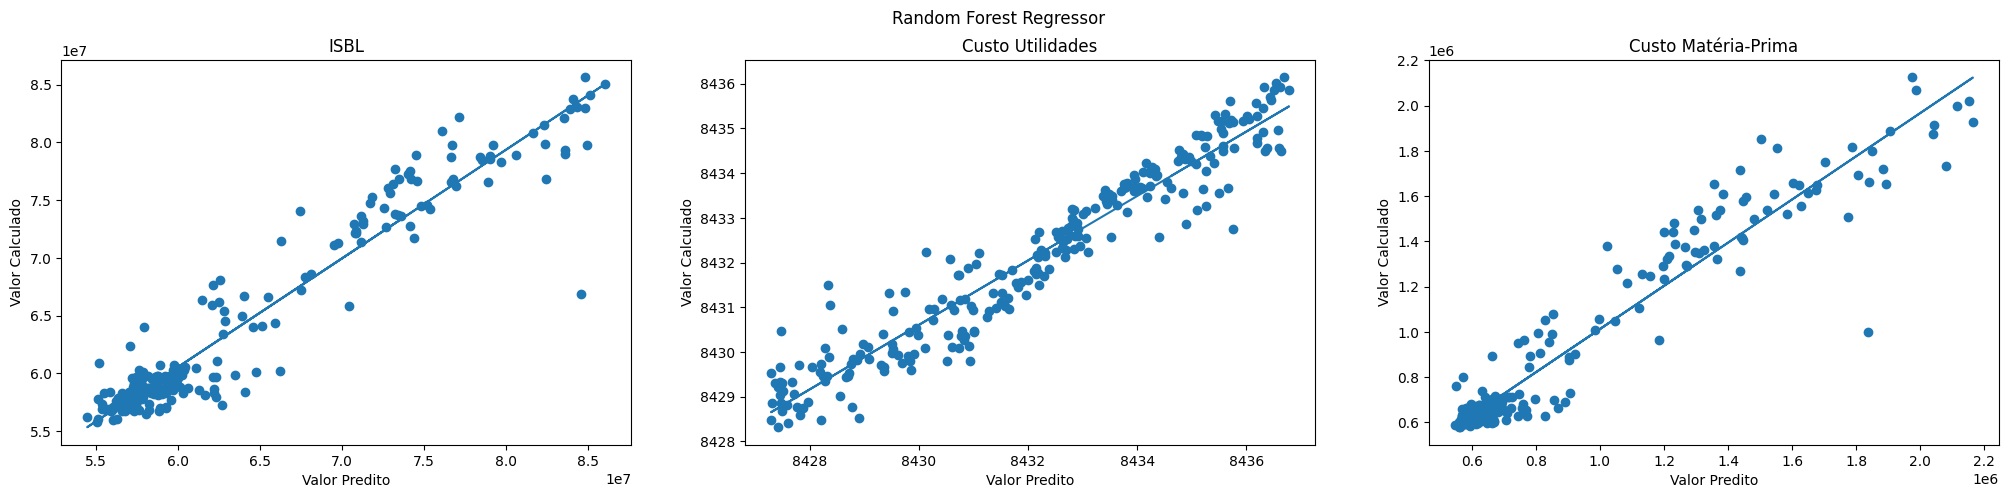

In [134]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
ax[0].scatter(y_test[0],pandas.DataFrame(rfr_search.predict(x_test))[0])
ax[1].scatter(y_test[1],pandas.DataFrame(rfr_search.predict(x_test))[1])
ax[2].scatter(y_test[2],pandas.DataFrame(rfr_search.predict(x_test))[2])
for i in ax:
    i.set_xlabel("Valor Predito")
    i.set_ylabel("Valor Calculado")
    

a, b = np.polyfit(y_test[0],pandas.DataFrame(rfr_search.predict(x_test))[0], deg=1)
y_est = a * y_test[0] + b
ax[0].plot(y_test[0],y_est)

a, b = np.polyfit(y_test[1],pandas.DataFrame(rfr_search.predict(x_test))[1], deg=1)
y_est = a * y_test[1] + b
ax[1].plot(y_test[1],y_est)

a, b = np.polyfit(y_test[2],pandas.DataFrame(rfr_search.predict(x_test))[2], deg=1)
y_est = a * y_test[2] + b
ax[2].plot(y_test[2],y_est)

fig.suptitle('Random Forest Regressor')
ax[0].set_title('ISBL')
ax[1].set_title('Custo Utilidades')
ax[2].set_title('Custo Matéria-Prima')

In [193]:

metrics.mean_squared_error(y_test[0],pandas.DataFrame(rfr_search.predict(x_test))[0],squared=False)/y_test[0].mean()

0.03704386484826298

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

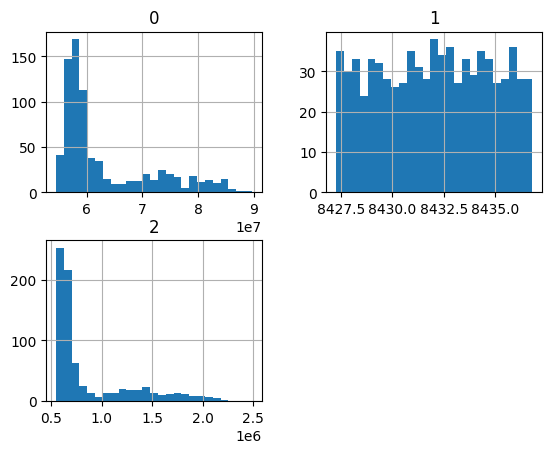

In [190]:
y.hist(bins=25)

In [140]:
def R2plot(model,model_name):
    fig,ax=plt.subplots(1,3,figsize=(25,5))
    ax[0].scatter(y_test[0],pandas.DataFrame(model.predict(x_test))[0])
    ax[1].scatter(y_test[1],pandas.DataFrame(model.predict(x_test))[1])
    ax[2].scatter(y_test[2],pandas.DataFrame(model.predict(x_test))[2])
    for i in ax:
        i.set_xlabel("Valor Predito")
        i.set_ylabel("Valor Calculado")
        

    a, b = np.polyfit(y_test[0],pandas.DataFrame(model.predict(x_test))[0], deg=1)
    y_est = a * y_test[0] + b
    ax[0].plot(y_test[0],y_est)

    a, b = np.polyfit(y_test[1],pandas.DataFrame(model.predict(x_test))[1], deg=1)
    y_est = a * y_test[1] + b
    ax[1].plot(y_test[1],y_est)

    a, b = np.polyfit(y_test[2],pandas.DataFrame(model.predict(x_test))[2], deg=1)
    y_est = a * y_test[2] + b
    ax[2].plot(y_test[2],y_est)

    fig.suptitle('{}'.format(model_name))
    ax[0].set_title('ISBL')
    ax[1].set_title('Custo Utilidades')
    ax[2].set_title('Custo Matéria-Prima')

In [139]:
# base_model_kriging=kriging.GaussianProcessRegressor().fit(x_train,y_train)
# base_model_kriging.score(x_test,y_test)

-3174015.837929363

In [202]:
m = keras.metrics.MeanSquaredError()
model_rna=keras.Sequential()

model_rna.add(keras.layers.Dense())

model_rna.add(keras.layers.Dense(16,activation='tanh'))
model_rna.add(keras.layers.Dense(16,activation='tanh'))
model_rna.add(keras.layers.Dense(1,activation='linear'))
model_rna.compile(optimizer='SGD',
    loss='mse')

model_rna.fit(x_train,y_train[0],batch_size=50, epochs=150)

metrics.r2_score(y_test[0],pandas.DataFrame(model_rna.predict(x_test))[0])

Epoch 1/150
11/11 [==============================] - 0s 1ms/step - loss: 1134428503932928.0000
Epoch 2/150
11/11 [==============================] - 0s 2ms/step - loss: 71364966875136.0000
Epoch 3/150
11/11 [==============================] - 0s 3ms/step - loss: 70565675139072.0000
Epoch 4/150
11/11 [==============================] - 0s 2ms/step - loss: 71231202131968.0000
Epoch 5/150
11/11 [==============================] - 0s 2ms/step - loss: 70600227815424.0000
Epoch 6/150
11/11 [==============================] - 0s 2ms/step - loss: 70508137676800.0000
Epoch 7/150
11/11 [==============================] - 0s 2ms/step - loss: 70811662680064.0000
Epoch 8/150
11/11 [==============================] - 0s 2ms/step - loss: 70714916864000.0000
Epoch 9/150
11/11 [==============================] - 0s 2ms/step - loss: 70780037627904.0000
Epoch 10/150
11/11 [==============================] - 0s 3ms/step - loss: 71494361153536.0000
Epoch 11/150
11/11 [==============================] - 0s 2ms/step -

-0.00329405030386809

In [203]:
(y_test[0],(model_rna.predict(x_test)))

8/8 [==============================] - 0s 1ms/step


(681    5.746376e+07
 91     5.975471e+07
 490    5.783152e+07
 428    8.236178e+07
 165    5.896655e+07
            ...     
 248    5.891884e+07
 356    5.683296e+07
 36     6.628536e+07
 180    5.590515e+07
 421    7.341116e+07
 Name: 0, Length: 256, dtype: float64,
 array([[63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [63776068.],
        [6377606

In [205]:
y_test

,0,1,2
681,5.746376e+07,8432.763592,5.946920e+05
91,5.975471e+07,8428.357561,6.454117e+05
490,5.783152e+07,8428.326574,6.035881e+05
428,8.236178e+07,8432.246631,1.786190e+06
165,5.896655e+07,8430.522540,6.448586e+05
...,...,...,...
248,5.891884e+07,8432.737521,6.406240e+05
356,5.683296e+07,8430.262536,5.865410e+05
36,6.628536e+07,8427.417195,1.053108e+06
180,5.590515e+07,8431.421677,5.685392e+05
